In [1]:
fileout2 = "/srv/beegfs02/scratch/aegis_guardian/data/Timothy/logs/deep_train557600.out"
with open(fileout2, "r") as file:
    textout2 = file.readlines()

In [2]:

import re
train_l2 = [float(
        v.strip("\n").split()[-4])
            for v in textout2 if re.findall("val_loss:", v)]
val_l2 = [float(
        v.strip("\n").split()[-1])
            for v in textout2 if re.findall("val_loss:", v)]
epochs2 = list(range(1, len(val_l2)+1))
print(train_l2)
print(val_l2)
print(epochs2)

[25.6678, 1.375, 1.003, 0.6887, 0.5207, 0.327, 0.2164, 0.1424, 0.0974, 0.057]
[2.1446, 1.1133, 0.834, 0.636, 0.4531, 0.3027, 0.1941, 0.1191, 0.0703, 0.0396]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


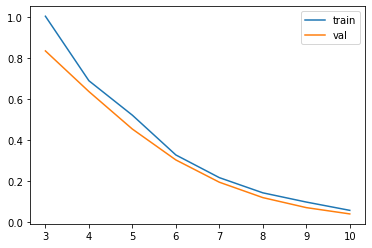

In [3]:
import matplotlib.pyplot as plt
plt.plot(epochs2[2:], train_l2[2:])
plt.plot(epochs2[2:], val_l2[2:])
# plt.ylim([0.000001, 0.06])
plt.legend(["train", "val"])
plt.show()

In [1]:
import pandas as pd
df = pd.read_csv('/srv/beegfs02/scratch/aegis_guardian/data/speed_prediction/train_processed.csv', header=None)
df.head()

,0,1,2
0,/srv/beegfs02/scratch/aegis_guardian/data/spee...,0.083333,0.499493
1,/srv/beegfs02/scratch/aegis_guardian/data/spee...,0.166667,0.500541
2,/srv/beegfs02/scratch/aegis_guardian/data/spee...,0.250000,0.501369
3,/srv/beegfs02/scratch/aegis_guardian/data/spee...,0.333333,0.502367
4,/srv/beegfs02/scratch/aegis_guardian/data/spee...,0.416667,0.503638


In [2]:
import csv
with open('sanity_check2.csv', 'w') as sanity_check:
    for i in range (5000):
        write = csv.writer(sanity_check)
        write.writerow(df.iloc[0])
        write.writerow(df.iloc[1])

In [12]:
import pandas as pd
df = pd.read_csv('/srv/beegfs02/scratch/aegis_guardian/data/datasets/finetuning/training/Hammond/speed_pred/commaai-speed-challenge-master/train50k_processed.csv', header=None)
df.columns = ['image_path', 'time', 'speed']
df.head()
len(df)

50000

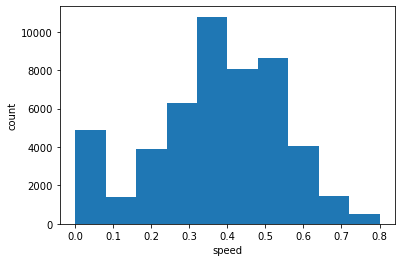

In [13]:
import matplotlib.pyplot as plt
plt.hist(df['speed'])
plt.xlabel('speed')
plt.ylabel('count')
plt.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
test_data = pd.read_csv('/srv/beegfs02/scratch/aegis_guardian/data/speed_prediction/deeps/test_data.csv')
# df.columns = ['image_path', 'time', 'speed']
test_data.head()

,Unnamed: 0,index,image_path,time,speed
0,0,35549,/srv/beegfs02/scratch/aegis_guardian/data/data...,2962.500000,0.610311
1,0,35550,/srv/beegfs02/scratch/aegis_guardian/data/data...,2962.583333,0.609983
2,0,12979,/srv/beegfs02/scratch/aegis_guardian/data/data...,1081.666667,0.000000
3,0,12980,/srv/beegfs02/scratch/aegis_guardian/data/data...,1081.750000,0.000000
4,0,43313,/srv/beegfs02/scratch/aegis_guardian/data/data...,3609.500000,0.532132


In [21]:
labels = []
error = []

scale_factor = 0.5
bright_factor=1
for i in range(0, len(test_data)-1):
    speed1 = test_data.iloc[i]['speed']
    speed2 = test_data.iloc[i+1]['speed']
    avg_speed = np.array([[np.mean([speed1,speed2])]])
    labels.append(avg_speed[0][0])
    i+=2

In [22]:
labels = np.sort(labels)
labels

array([0.        , 0.        , 0.        , ..., 0.79636624, 0.79734195,
       0.79781009])

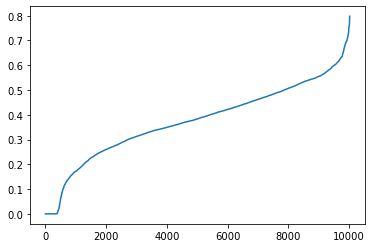

In [23]:
plt.plot(labels)

2022-05-01 18:03:54.389556: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/itetnas04/data-scratch-01/zahmad/data/conda_envs/tf-env/lib/python3.8/site-packages/cv2/../../lib64:
2022-05-01 18:03:54.412038: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-01 18:04:31.274356: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-01 18:04:31.280891: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/itetnas04/data-





PERFROMING TESTS NOW
done!
MSE: 0.02395799542979934
********time************ 1449.86661
      labels     speed
7404     0.0  0.362315
4606     0.0  0.338017
1536     0.0  0.352578
9606     0.0  0.380815
1540     0.0  0.352448
4338     0.0  0.429419
6698     0.0  0.358266
8372     0.0  0.311554
1578     0.0  0.368195
1586     0.0  0.317061


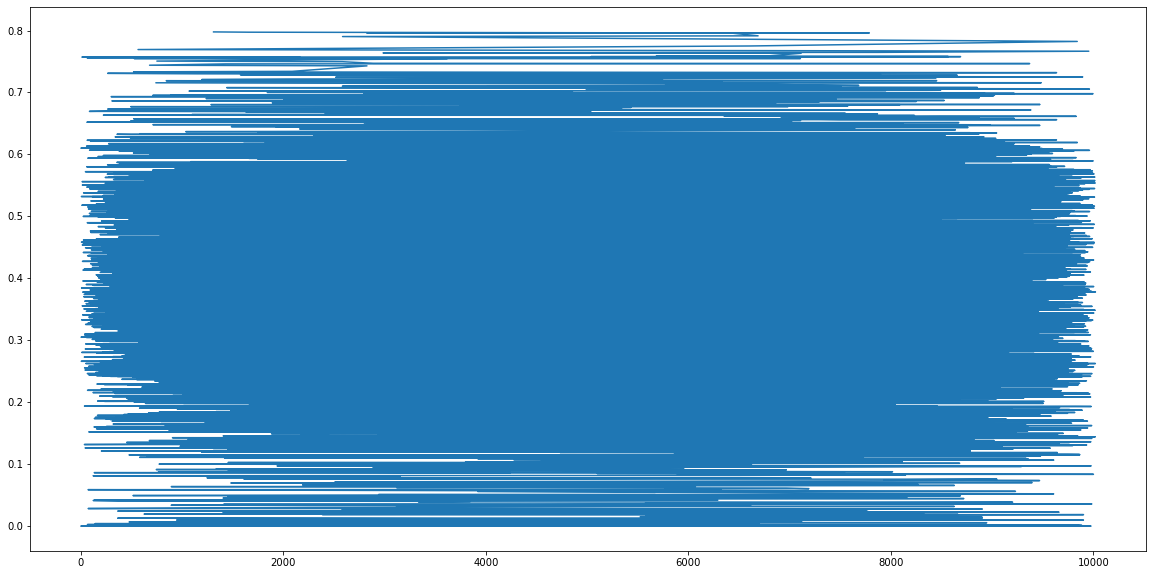

In [25]:
from audioop import avg
import pandas as pd
import numpy as np
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

np.random.seed(143)

test_data = pd.read_csv('/srv/beegfs02/scratch/aegis_guardian/data/speed_prediction/deeps/test_data.csv')

def change_brightness(image, bright_factor):
    """
    Augments the brightness of the image by multiplying the saturation by a uniform random variable
    Input: image (RGB)
    returns: image with brightness augmentation
    """
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # perform brightness augmentation only on the second channel
    hsv_image[:,:,2] = hsv_image[:,:,2] * bright_factor
    
    # change back to RGB
    image_rgb = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return image_rgb



def opticalFlowDense(image_current, image_next):
    prvs = cv2.cvtColor(image_current, cv2.COLOR_RGB2GRAY)
    hsv = np.zeros_like(image_current)
    hsv[...,1] = 255
    next = cv2.cvtColor(image_next, cv2.COLOR_RGB2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    
    return rgb

def crop_image(image, scale):
    """
    preprocesses the image
    
    input: image (480 (y), 640 (x), 3) RGB
    output: image (shape is (66, 220, 3) as RGB)
    
    This stuff is performed on my validation data and my training data
    Process: 
             1) Cropping out black spots
             3) resize to (66, 220, 3) if not done so already from perspective transform
    """
    # Crop out sky (top 130px) and the hood of the car (bottom 270px) 
    image_cropped = image[130:370,:] # -> (240, 640, 3)
    
    height = int(240*scale)
    width = int(640*scale)
    image = cv2.resize(image_cropped, (220, 66), interpolation = cv2.INTER_AREA)
    
    return image


def preprocess_image_valid_from_path(image_path, scale_factor=0.5):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = crop_image(img, scale_factor)
    return img

def preprocess_image_from_path(image_path, scale_factor=0.5, bright_factor=1):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = change_brightness(img, bright_factor)
    img = crop_image(img, scale_factor)
    return img


def generate_training_data(data, batch_size = 16, scale_factor = 0.5):
    # sample an image from the data to compute image size
    img = preprocess_image_from_path(train_data.iloc[1]['image_path'],scale_factor)

    # create empty batches
    image_batch = np.zeros((batch_size, img.shape[0], img.shape[1], img.shape[2]))
    label_batch = np.zeros(batch_size)
    i=0
    
    while True:
        speed1 = data.iloc[i]['speed']
        speed2 = data.iloc[i+1]['speed']
        
        bright_factor = 0.2 + np.random.uniform()
        img1 = preprocess_image_from_path(data.iloc[i]['image_path'],scale_factor,bright_factor)
        img2 = preprocess_image_from_path(data.iloc[i+1]['image_path'],scale_factor,bright_factor)
        
    
        rgb_flow_diff = opticalFlowDense(img1,img2)
        avg_speed = np.mean([speed1,speed2])
        
        image_batch[(i//2)%batch_size] = rgb_flow_diff
        label_batch[(i//2)%batch_size] = avg_speed
        
        if not(((i//2)+1)%batch_size):
            yield image_batch, label_batch
        i+=2
        i=i%data.shape[0]

def generate_validation_data(data, batch_size = 16, scale_factor = 0.5):
    # sample an image from the data to compute image size
    img = preprocess_image_from_path(train_data.iloc[1]['image_path'],scale_factor)

    # create empty batches
    image_batch = np.zeros((batch_size, img.shape[0], img.shape[1], img.shape[2]))
    label_batch = np.zeros(batch_size)
    i=0
    
    while True:
        speed1 = data.iloc[i]['speed']
        speed2 = data.iloc[i+1]['speed']
        
        bright_factor = 0.2 + np.random.uniform()
        img1 = preprocess_image_from_path(data.iloc[i]['image_path'],scale_factor,bright_factor)
        img2 = preprocess_image_from_path(data.iloc[i+1]['image_path'],scale_factor,bright_factor)
        
    
        rgb_flow_diff = opticalFlowDense(img1,img2)
        avg_speed = np.mean([speed1,speed2])
        
        image_batch[(i//2)%batch_size] = rgb_flow_diff
        label_batch[(i//2)%batch_size] = avg_speed

        i1 = data.iloc[i]['image_path']
        i2 = data.iloc[i+1]['image_path']
        # print(f'\nImage {i}: {i1}')
        # print(f'Image {i+1}: {i2}')
        # print(f'Image 1 processed: {np.average(img1)}')
        # print(f'Image 2 processed: {np.average(img2)}')
        # print(f'Optical flow avg: {np.average(rgb_flow_diff)}')
        # print(f'Label: {avg_speed}')
        
        if not(((i//2)+1)%batch_size):
            yield image_batch, label_batch
        i+=2
        i=i%data.shape[0]


from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Activation, Dropout, Flatten, Dense, Lambda
from keras.layers import ELU
# from tensorflow.keras.optimizers import Adam
import keras.backend as KTF


N_img_height = 66
N_img_width = 220
N_img_channels = 3
def nvidia_model():
    inputShape = (N_img_height, N_img_width, N_img_channels)

    model = Sequential()
    # normalization    
    # perform custom normalization before lambda layer in network
    model.add(Lambda(lambda x: x/ 127.5 - 1, input_shape = inputShape))

    model.add(Convolution2D(24, (5, 5), 
                            strides=(2,2), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv1'))
    
    
    model.add(ELU())    
    model.add(Convolution2D(36, (5, 5), 
                            strides=(2,2), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv2'))
    
    model.add(ELU())    
    model.add(Convolution2D(48, (5, 5), 
                            strides=(2,2), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv3'))
    model.add(ELU())
    model.add(Dropout(0.5))
    model.add(Convolution2D(64, (3, 3), 
                            strides = (1,1), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv4'))
    
    model.add(ELU())              
    model.add(Convolution2D(64, (3, 3), 
                            strides= (1,1), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv5'))
              
              
    model.add(Flatten(name = 'flatten'))
    model.add(ELU())
    model.add(Dense(100, kernel_initializer = 'he_normal', name = 'fc1'))
    model.add(ELU())
    model.add(Dense(50, kernel_initializer = 'he_normal', name = 'fc2'))
    model.add(ELU())
    model.add(Dense(10, kernel_initializer = 'he_normal', name = 'fc3'))
    model.add(ELU())
    
    # do not put activation at the end because we want to exact output, not a class identifier
    model.add(Dense(1, name = 'output', kernel_initializer = 'he_normal'))
    
    adam = keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optimizer = adam, loss = 'mse')

    return model



model = nvidia_model()


# # TEST SCRIPT
print('\n\n\n\nPERFROMING TESTS NOW')
import time
start=start = time.time()
# load weight
model.load_weights('deep_train_fixed3_2.h5')


import os
predict_speed = []
labels = []
error = []

# i=0
scale_factor = 0.5
bright_factor=1
for i in range(0, len(test_data)-1):
    speed1 = test_data.iloc[i]['speed']
    speed2 = test_data.iloc[i+1]['speed']

    # path1 = '/srv/beegfs02/scratch/aegis_guardian/data/Datasets_ML_Pipeline/Drive360Challenge/Drive360Images/' + test_data.iloc[i]['image_path']
    # path2 = '/srv/beegfs02/scratch/aegis_guardian/data/Datasets_ML_Pipeline/Drive360Challenge/Drive360Images/' + test_data.iloc[i+1]['image_path']

    # print(path1)
    # print(path2)
    img1 = preprocess_image_from_path(test_data.iloc[i]['image_path'],scale_factor,bright_factor)
    img2 = preprocess_image_from_path(test_data.iloc[i+1]['image_path'],scale_factor,bright_factor)
    

    rgb_diff = opticalFlowDense(img1, img2)
    rgb_diff = rgb_diff.reshape(1, rgb_diff.shape[0], rgb_diff.shape[1], rgb_diff.shape[2])
    avg_speed = np.array([[np.mean([speed1,speed2])]])

    i1 = test_data.iloc[i]['image_path']
    i2 = test_data.iloc[i+1]['image_path']
    
    prediction = model.predict(rgb_diff)
    predict_speed.append(float(prediction[0][0]))
    err = abs(avg_speed[0][0]-prediction[0][0])
    labels.append(avg_speed[0][0])
    error.append(err)
    
#     print('------------------------------------------------------------------------------------------')
#     print(f'\nImage {i}: {i1}')
#     print(f'Image {i+1}: {i2}')
#     print(f'Image 1 processed: {np.average(img1)}')
#     print(f'Image 2 processed: {np.average(img2)}')
#     print(f'Optical flow avg: {np.average(rgb_diff)}')
#     print(f'Truth: {avg_speed[0][0]} Prediction: {prediction[0][0]}  Error:{err}')
#     print('------------------------------------------------------------------------------------------')
    i+=2

print('done!')

from sklearn.metrics import mean_squared_error
print(f"MSE: {mean_squared_error(labels, predict_speed)}")
# print(f'AVG of err array: {np.mean(error)}')

end  = time.time()
exc_time = end-start
print('********time************', round(exc_time, 5))


list_of_tuples = list(zip(labels, predict_speed))
plot_df = pd.DataFrame(list_of_tuples, columns = ['labels', 'speed'])
plot_df = plot_df.sort_values(by=['labels'], ascending=True)
print(plot_df.head(10))

plt.figure(1, figsize=(20,10))
plt.plot(plot_df['labels'])
# plt.plot(plot_df['speed'])


In [28]:
plot_df = plot_df.sort_values(by=['labels'], ascending=True)
print(plot_df.reset_index().head(10))

   index  labels     speed
0   7404     0.0  0.362315
1    652     0.0  0.354077
2   8814     0.0  0.335834
3   8815     0.0  0.397562
4   8816     0.0  0.331046
5   4298     0.0  0.349672
6    660     0.0  0.429892
7   8834     0.0  0.315490
8   1154     0.0  0.403220
9   1150     0.0  0.331011


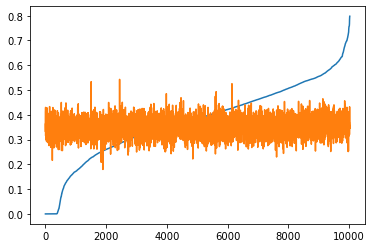

In [43]:
lb = plot_df.labels
ab = plot_df.speed
lb = lb.array
ab = ab.array
plt.plot(lb)
plt.plot(ab)

In [53]:
test_data = pd.read_csv('/srv/beegfs02/scratch/aegis_guardian/data/Datasets_ML_Pipeline/Drive360Challenge/Drive360Images/drive360challenge_validation.csv')
test_data = test_data.iloc[:1000]
test_data.head()

,cameraRight,cameraFront,cameraRear,cameraLeft,here,tomtom,gpsLatitude,gpsLongitude,gpsAltitude,gpsPrecision,...,hereCurrentHeading,here1mHeading,here5mHeading,here10mHeading,here20mHeading,here50mHeading,hereTurnNumber,canSteering,canSpeed,chapter
0,Zurich_6/go_pro_1/image/25/img00001.jpg,Zurich_6/go_pro_4/image/25/img00001.jpg,Zurich_6/go_pro_5/image/25/img00001.jpg,Zurich_6/go_pro_8/image/25/img00001.jpg,Zurich_6/here/image/25/img00001.jpg,Zurich_6/tomtom/image/25/img00001.jpg,47.372061,8.522008,465.450061,209.0,...,180.000000,44.915035,44.915042,44.915051,44.915068,44.704121,1,-8.0,0.0,0
1,Zurich_6/go_pro_1/image/25/img00002.jpg,Zurich_6/go_pro_4/image/25/img00002.jpg,Zurich_6/go_pro_5/image/25/img00002.jpg,Zurich_6/go_pro_8/image/25/img00002.jpg,Zurich_6/here/image/25/img00002.jpg,Zurich_6/tomtom/image/25/img00002.jpg,47.372061,8.522009,465.473628,209.0,...,135.084967,0.000002,0.000009,0.000017,0.000035,-0.211135,1,-8.0,0.0,0
2,Zurich_6/go_pro_1/image/25/img00003.jpg,Zurich_6/go_pro_4/image/25/img00003.jpg,Zurich_6/go_pro_5/image/25/img00003.jpg,Zurich_6/go_pro_8/image/25/img00003.jpg,Zurich_6/here/image/25/img00003.jpg,Zurich_6/tomtom/image/25/img00003.jpg,47.372061,8.522009,465.503036,209.0,...,135.084967,0.000002,0.000009,0.000017,0.000035,-0.211135,1,-8.0,0.0,0
3,Zurich_6/go_pro_1/image/25/img00004.jpg,Zurich_6/go_pro_4/image/25/img00004.jpg,Zurich_6/go_pro_5/image/25/img00004.jpg,Zurich_6/go_pro_8/image/25/img00004.jpg,Zurich_6/here/image/25/img00004.jpg,Zurich_6/tomtom/image/25/img00004.jpg,47.372061,8.522009,465.535431,209.0,...,135.084967,0.000002,0.000009,0.000017,0.000035,-0.211135,1,-8.0,0.0,0
4,Zurich_6/go_pro_1/image/25/img00005.jpg,Zurich_6/go_pro_4/image/25/img00005.jpg,Zurich_6/go_pro_5/image/25/img00005.jpg,Zurich_6/go_pro_8/image/25/img00005.jpg,Zurich_6/here/image/25/img00005.jpg,Zurich_6/tomtom/image/25/img00005.jpg,47.372061,8.522009,465.558289,209.0,...,135.084967,0.000002,0.000009,0.000017,0.000035,-0.211135,1,-8.0,0.0,0


In [54]:
test_data = test_data[['cameraRight', 'canSpeed']]
test_data.rename({'cameraRight': 'image_path', 'canSpeed': 'speed'}, axis=1, inplace=True)
test_data.head()

,image_path,speed
0,Zurich_6/go_pro_1/image/25/img00001.jpg,0.0
1,Zurich_6/go_pro_1/image/25/img00002.jpg,0.0
2,Zurich_6/go_pro_1/image/25/img00003.jpg,0.0
3,Zurich_6/go_pro_1/image/25/img00004.jpg,0.0
4,Zurich_6/go_pro_1/image/25/img00005.jpg,0.0


In [58]:
test_data['image_path'] = ['/srv/beegfs02/scratch/aegis_guardian/data/Datasets_ML_Pipeline/Drive360Challenge/Drive360Images/' + i for i in test_data.image_path]
test_data.head()

,image_path,speed
0,/srv/beegfs02/scratch/aegis_guardian/data/Data...,0.0
1,/srv/beegfs02/scratch/aegis_guardian/data/Data...,0.0
2,/srv/beegfs02/scratch/aegis_guardian/data/Data...,0.0
3,/srv/beegfs02/scratch/aegis_guardian/data/Data...,0.0
4,/srv/beegfs02/scratch/aegis_guardian/data/Data...,0.0


In [ ]:
from audioop import avg
import pandas as pd
import numpy as np
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

np.random.seed(143)

def change_brightness(image, bright_factor):
    """
    Augments the brightness of the image by multiplying the saturation by a uniform random variable
    Input: image (RGB)
    returns: image with brightness augmentation
    """
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # perform brightness augmentation only on the second channel
    hsv_image[:,:,2] = hsv_image[:,:,2] * bright_factor
    
    # change back to RGB
    image_rgb = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return image_rgb



def opticalFlowDense(image_current, image_next):
    prvs = cv2.cvtColor(image_current, cv2.COLOR_RGB2GRAY)
    hsv = np.zeros_like(image_current)
    hsv[...,1] = 255
    next = cv2.cvtColor(image_next, cv2.COLOR_RGB2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    
    return rgb

def crop_image(image, scale):
    """
    preprocesses the image
    
    input: image (480 (y), 640 (x), 3) RGB
    output: image (shape is (66, 220, 3) as RGB)
    
    This stuff is performed on my validation data and my training data
    Process: 
             1) Cropping out black spots
             3) resize to (66, 220, 3) if not done so already from perspective transform
    """
    # Crop out sky (top 130px) and the hood of the car (bottom 270px) 
    image_cropped = image[130:370,:] # -> (240, 640, 3)
    
    height = int(240*scale)
    width = int(640*scale)
    image = cv2.resize(image_cropped, (220, 66), interpolation = cv2.INTER_AREA)
    
    return image


def preprocess_image_valid_from_path(image_path, scale_factor=0.5):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = crop_image(img, scale_factor)
    return img

def preprocess_image_from_path(image_path, scale_factor=0.5, bright_factor=1):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = change_brightness(img, bright_factor)
    img = crop_image(img, scale_factor)
    return img


# def generate_training_data(data, batch_size = 16, scale_factor = 0.5):
#     # sample an image from the data to compute image size
#     img = preprocess_image_from_path(train_data.iloc[1]['image_path'],scale_factor)

#     # create empty batches
#     image_batch = np.zeros((batch_size, img.shape[0], img.shape[1], img.shape[2]))
#     label_batch = np.zeros(batch_size)
#     i=0
    
#     while True:
#         speed1 = data.iloc[i]['speed']
#         speed2 = data.iloc[i+1]['speed']
        
#         bright_factor = 0.2 + np.random.uniform()
#         img1 = preprocess_image_from_path(data.iloc[i]['image_path'],scale_factor,bright_factor)
#         img2 = preprocess_image_from_path(data.iloc[i+1]['image_path'],scale_factor,bright_factor)
        
    
#         rgb_flow_diff = opticalFlowDense(img1,img2)
#         avg_speed = np.mean([speed1,speed2])
        
#         image_batch[(i//2)%batch_size] = rgb_flow_diff
#         label_batch[(i//2)%batch_size] = avg_speed
        
#         if not(((i//2)+1)%batch_size):
#             yield image_batch, label_batch
#         i+=2
#         i=i%data.shape[0]

# def generate_validation_data(data, batch_size = 16, scale_factor = 0.5):
#     # sample an image from the data to compute image size
#     img = preprocess_image_from_path(train_data.iloc[1]['image_path'],scale_factor)

#     # create empty batches
#     image_batch = np.zeros((batch_size, img.shape[0], img.shape[1], img.shape[2]))
#     label_batch = np.zeros(batch_size)
#     i=0
    
#     while True:
#         speed1 = data.iloc[i]['speed']
#         speed2 = data.iloc[i+1]['speed']
        
#         bright_factor = 0.2 + np.random.uniform()
#         img1 = preprocess_image_from_path(data.iloc[i]['image_path'],scale_factor,bright_factor)
#         img2 = preprocess_image_from_path(data.iloc[i+1]['image_path'],scale_factor,bright_factor)
        
    
#         rgb_flow_diff = opticalFlowDense(img1,img2)
#         avg_speed = np.mean([speed1,speed2])
        
#         image_batch[(i//2)%batch_size] = rgb_flow_diff
#         label_batch[(i//2)%batch_size] = avg_speed

#         i1 = data.iloc[i]['image_path']
#         i2 = data.iloc[i+1]['image_path']
#         # print(f'\nImage {i}: {i1}')
#         # print(f'Image {i+1}: {i2}')
#         # print(f'Image 1 processed: {np.average(img1)}')
#         # print(f'Image 2 processed: {np.average(img2)}')
#         # print(f'Optical flow avg: {np.average(rgb_flow_diff)}')
#         # print(f'Label: {avg_speed}')
        
#         if not(((i//2)+1)%batch_size):
#             yield image_batch, label_batch
#         i+=2
#         i=i%data.shape[0]


from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Activation, Dropout, Flatten, Dense, Lambda
from keras.layers import ELU
# from tensorflow.keras.optimizers import Adam
import keras.backend as KTF


N_img_height = 66
N_img_width = 220
N_img_channels = 3
def nvidia_model():
    inputShape = (N_img_height, N_img_width, N_img_channels)

    model = Sequential()
    # normalization    
    # perform custom normalization before lambda layer in network
    model.add(Lambda(lambda x: x/ 127.5 - 1, input_shape = inputShape))

    model.add(Convolution2D(24, (5, 5), 
                            strides=(2,2), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv1'))
    
    
    model.add(ELU())    
    model.add(Convolution2D(36, (5, 5), 
                            strides=(2,2), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv2'))
    
    model.add(ELU())    
    model.add(Convolution2D(48, (5, 5), 
                            strides=(2,2), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv3'))
    model.add(ELU())
    model.add(Dropout(0.5))
    model.add(Convolution2D(64, (3, 3), 
                            strides = (1,1), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv4'))
    
    model.add(ELU())              
    model.add(Convolution2D(64, (3, 3), 
                            strides= (1,1), 
                            padding = 'valid',
                            kernel_initializer = 'he_normal',
                            name = 'conv5'))
              
              
    model.add(Flatten(name = 'flatten'))
    model.add(ELU())
    model.add(Dense(100, kernel_initializer = 'he_normal', name = 'fc1'))
    model.add(ELU())
    model.add(Dense(50, kernel_initializer = 'he_normal', name = 'fc2'))
    model.add(ELU())
    model.add(Dense(10, kernel_initializer = 'he_normal', name = 'fc3'))
    model.add(ELU())
    
    # do not put activation at the end because we want to exact output, not a class identifier
    model.add(Dense(1, name = 'output', kernel_initializer = 'he_normal'))
    
    adam = keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optimizer = adam, loss = 'mse')

    return model



model = nvidia_model()


# # TEST SCRIPT
print('\n\n\n\nPERFROMING TESTS NOW')
import time
start=start = time.time()
# load weight
model.load_weights('/srv/beegfs02/scratch/aegis_guardian/data/speed_prediction/deeps/deep_train_fixed3_2.h5')


import os
predict_speed = []
labels = []
error = []

# i=0
scale_factor = 0.5
bright_factor=1
for i in range(0, len(test_data)-1):
    speed1 = test_data.iloc[i]['speed']
    speed2 = test_data.iloc[i+1]['speed']

    img1 = preprocess_image_from_path(test_data.iloc[i]['image_path'],scale_factor,bright_factor)
    img2 = preprocess_image_from_path(test_data.iloc[i+1]['image_path'],scale_factor,bright_factor)
    

    rgb_diff = opticalFlowDense(img1, img2)
    rgb_diff = rgb_diff.reshape(1, rgb_diff.shape[0], rgb_diff.shape[1], rgb_diff.shape[2])
    avg_speed = np.array([[np.mean([speed1,speed2])]])

    i1 = test_data.iloc[i]['image_path']
    i2 = test_data.iloc[i+1]['image_path']
    
    prediction = model.predict(rgb_diff)
    predict_speed.append(float(prediction[0][0]))
    err = abs(avg_speed[0][0]-prediction[0][0])
    labels.append(avg_speed[0][0])
    error.append(err)
    
#     print('------------------------------------------------------------------------------------------')
#     print(f'\nImage {i}: {i1}')
#     print(f'Image {i+1}: {i2}')
#     print(f'Image 1 processed: {np.average(img1)}')
#     print(f'Image 2 processed: {np.average(img2)}')
#     print(f'Optical flow avg: {np.average(rgb_diff)}')
    print(f'Truth: {avg_speed[0][0]} Prediction: {prediction[0][0]}  Error:{err}')
#     print('------------------------------------------------------------------------------------------')
    i+=1

print('done!')

from sklearn.metrics import mean_squared_error
print(f"MSE: {mean_squared_error(labels, predict_speed)}")
# print(f'AVG of err array: {np.mean(error)}')

end  = time.time()
exc_time = end-start
print('********time************', round(exc_time, 5))


list_of_tuples = list(zip(labels, predict_speed))
plot_df = pd.DataFrame(list_of_tuples, columns = ['labels', 'speed'])
# plot_df = plot_df.sort_values(by=['labels'], ascending=True)
print(plot_df.head(10))

plt.figure(1, figsize=(20,10))
plt.plot(plot_df['labels'])
plt.plot(plot_df['speed'])
